# Loan Allocation Calculator

## Importing Libraries for the project

This project will be conducted through Python 3 and all of its subsequent libraries. The two machine learning models that will be used are Logistic Regression and Random Forest Regressor. Since we want to predict the amount of loan an individual can get based on salary, gender, etc... Regressions models will be used for this project.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
train = pd.read_csv('loan_train.csv')
test = pd.read_csv('loan_test.csv')

In [5]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.info()
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(614, 13)

In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
test.info()
test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


(367, 12)

The columns we are working with in both the test and training datasets are as follows:
    1 - Loan_ID,
    2 - Gender,
    3 - Married,
    4 - Education,
    5 - Self_Employed, 
    6 - ApplicantIncome,
    7 - CoapplicantIncome,
    8 - LoanAmount,
    9 - Loan_Amount_Term,
    10 - Credit History,
    11 - Property_Area, 
    12 - For only the training dataset is - Loan_Status. ,
    


## Data Cleaning

Before proceeding, we want to clean the dataset by searching for duplicates and any missing values. During this phase, though a lengthy and most important, we want to understand the data thoroughly and make sure we do not eliminate any values by accident. Both the training and testing data sets will be looked at carefully to see missing values and understanding why those points are missing from the datasets.  

In [9]:
train.drop('Loan_ID', axis=1, inplace=True)
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train.duplicated().sum()

0

In [11]:
train = train.fillna(train.bfill())
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
train = train.dropna()

In [14]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.00000
mean,5403.459283,1621.245798,146.416938,342.410423,0.84202
std,6109.041673,2926.248369,84.917398,64.428629,0.36502
min,150.000000,0.000000,9.000000,12.000000,0.00000
25%,2877.500000,0.000000,100.000000,360.000000,1.00000
50%,3812.500000,1188.500000,128.000000,360.000000,1.00000
75%,5795.000000,2297.250000,166.750000,360.000000,1.00000
max,81000.000000,41667.000000,700.000000,480.000000,1.00000


In [16]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [17]:
test.drop('Loan_ID', axis=1, inplace=True)

In [18]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [19]:
test = test.fillna(test.bfill())
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [20]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [21]:
test = test.dropna()

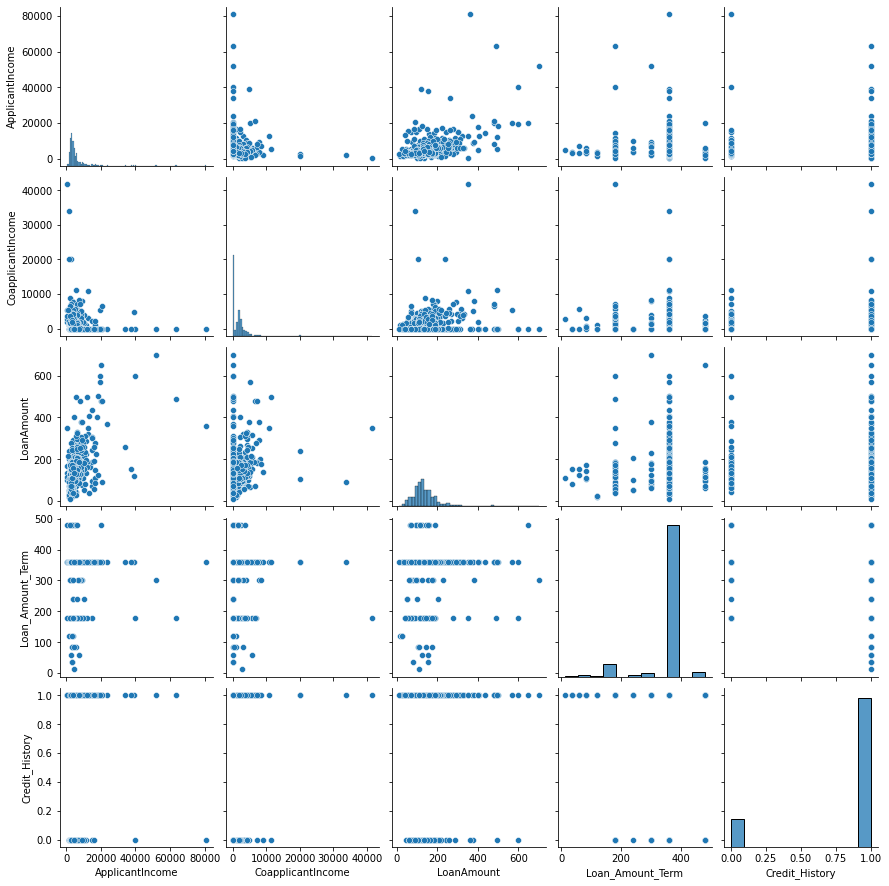

In [22]:
sns.pairplot(train)
plt.show()

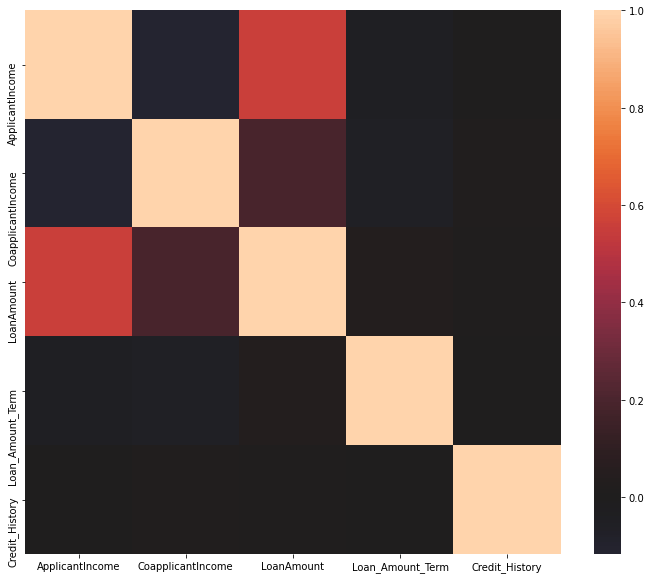

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), center=0, robust=True)
plt.show()

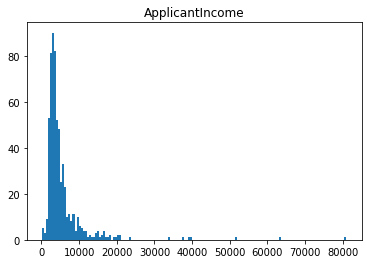

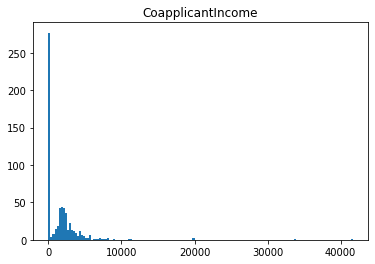

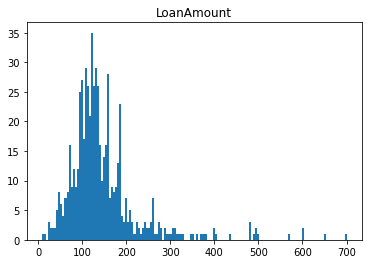

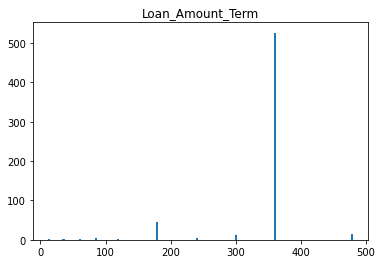

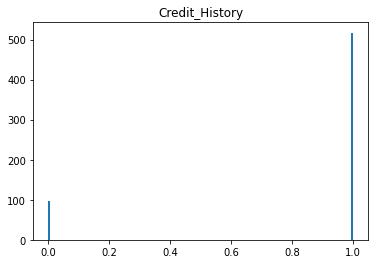

In [24]:
num = train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = train.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  train[num]
#categoric df
loan_cat = train[cat]

for i in loan_num:
    plt.hist(loan_num[i], bins=150)
    plt.title(i)
    plt.show()

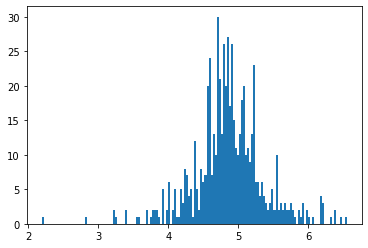

In [25]:
loan = train['LoanAmount']

log_loan = np.log(loan)
plt.hist(log_loan, bins = 150)
plt.show()

train['LoanAmount'] = loan

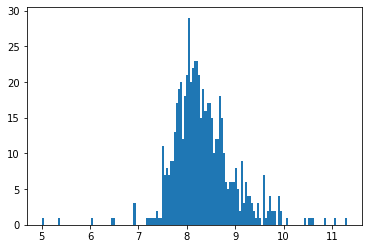

In [26]:
Ai = train['ApplicantIncome']

log_loan1 = np.log(Ai)
plt.hist(log_loan1, bins = 150)
plt.show()

train['ApplicantIncome'] = Ai

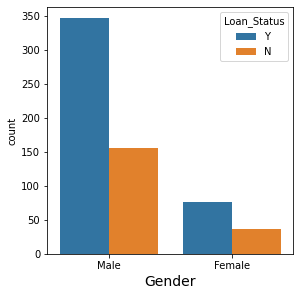

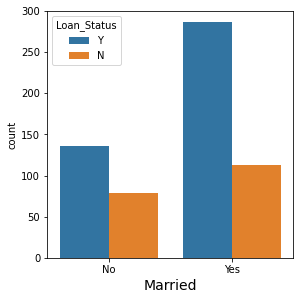

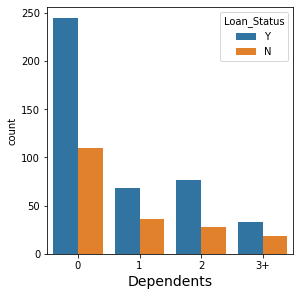

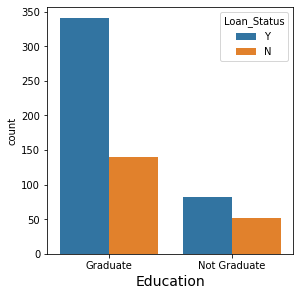

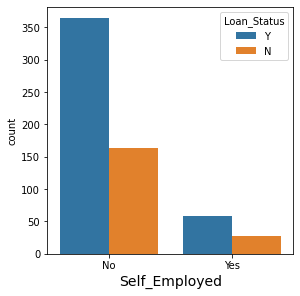

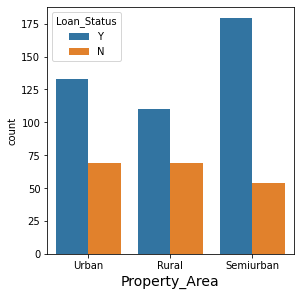

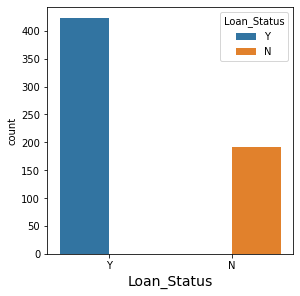

In [27]:
for i in loan_cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=train)
    plt.xlabel(i, fontsize=14)

In [28]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols :
    train[col] = le.fit_transform(train[col])

cols1 = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']
le = LabelEncoder()
for col in cols1 :
    test[col] = le.fit_transform(test[col])

In [29]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 61.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ----

In [30]:
train = train.astype({"CoapplicantIncome":'int', "LoanAmount":'int', 'Loan_Amount_Term':'int', 'Credit_History':'int'}) 
test = test.astype({"LoanAmount":'int', 'Loan_Amount_Term':'int', 'Credit_History':'int'}) 

In [31]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,128,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1


In [32]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110,360,1,2
1,1,1,1,0,0,3076,1500,126,360,1,2
2,1,1,2,0,0,5000,1800,208,360,1,2
3,1,1,2,0,0,2340,2546,100,360,1,2
4,1,0,0,1,0,3276,0,78,360,1,2


In [33]:
print(f"training set (row, col): {train.shape}\n\ntesting set (row, col): {test.shape}")

training set (row, col): (614, 12)

testing set (row, col): (367, 11)


In [34]:
selector = VarianceThreshold(threshold=0)
print(selector.fit_transform(test))
print(selector.get_support(indices=True))
num_cols = list(test.columns[selector.get_support(indices=True)])
 
print(num_cols)

[[  1   1   0 ... 360   1   2]
 [  1   1   1 ... 360   1   2]
 [  1   1   2 ... 360   1   2]
 ...
 [  1   0   0 ... 360   1   1]
 [  1   1   0 ... 360   1   0]
 [  1   0   0 ... 180   1   0]]
[ 0  1  2  3  4  5  6  7  8  9 10]
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [35]:
selector1 = VarianceThreshold(threshold=0)
print(selector1.fit_transform(train))
print(selector1.get_support(indices=True))
num_cols = list(train.columns[selector.get_support(indices=True)])
 
print(num_cols)

[[1 0 0 ... 1 2 1]
 [1 1 1 ... 1 0 0]
 [1 1 0 ... 1 2 1]
 ...
 [1 1 1 ... 1 2 1]
 [1 1 2 ... 1 2 1]
 [0 0 0 ... 0 1 0]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [36]:
features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',]
y = np.array(train['Loan_Status'])
X = train[features]


In [37]:
X_y = train.copy()
X_y['Loan_Status'] = y
 
print(X_y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [38]:
from sklearn.feature_selection import mutual_info_regression
 
print(mutual_info_regression(X, y, random_state=68))

[0.         0.00877275 0.01289887 0.         0.06464025 0.03600742
 0.04482228 0.09421375 0.        ]


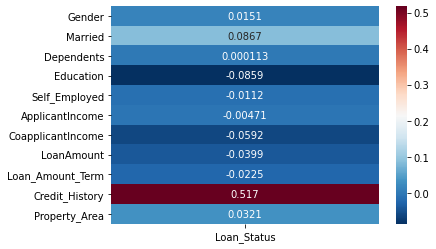

In [39]:
corr_matrix = X_y.corr()
 
# Isolate the column corresponding to `exam_score`
corr_target = corr_matrix[['Loan_Status']].drop(labels=['Loan_Status'])
 
sns.heatmap(corr_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

In [40]:
from sklearn.feature_selection import SelectKBest
from functools import partial
 
score_func = partial(mutual_info_regression, discrete_features=[0], random_state=68)
 
# Select top 3 features with the most mutual information
selection = SelectKBest(score_func=score_func, k=3)
 
print(selection.fit_transform(X, y))

[[5849    0    1]
 [4583 1508    1]
 [3000    0    1]
 ...
 [8072  240    1]
 [7583    0    1]
 [4583    0    0]]


In [41]:
print(mutual_info_regression(X, y, discrete_features=[0], random_state=68))


[0.         0.         0.         0.         0.02647066 0.00860389
 0.         0.11228321 0.00381221]


In [42]:
X = X[X.columns[selection.get_support(indices=True)]]

 
print(X)

     ApplicantIncome  CoapplicantIncome  Credit_History
0               5849                  0               1
1               4583               1508               1
2               3000                  0               1
3               2583               2358               1
4               6000                  0               1
..               ...                ...             ...
609             2900                  0               1
610             4106                  0               1
611             8072                240               1
612             7583                  0               1
613             4583                  0               0

[614 rows x 3 columns]


In [43]:
features1 = ['Gender', 'Dependents', 'Credit_History']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [119]:
classifier = RandomForestRegressor(n_estimators = 1000, random_state = 1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.022224863240487558


In [120]:
from sklearn.ensemble import RandomForestRegressor

classifier_1 = RandomForestRegressor(n_estimators = 1000, random_state = 1)
classifier_1.fit(X_train, y_train)
score_1 = classifier_1.score(X_test, y_test)
print(score_1)

0.022224863240487558


In [121]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

test_X = test[features1]
test_L = LR.predict(test_X)

#  prediction Summary by species
print(classification_report(y_test, y_predict))
print('MAE is:', mean_absolute_error(y_predict,y_test))

# Accuracy score
print('Accuracy is:',accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        51
           1       0.82      0.98      0.89       134

    accuracy                           0.83       185
   macro avg       0.85      0.71      0.75       185
weighted avg       0.84      0.83      0.81       185

MAE is: 0.16756756756756758
Accuracy is: 0.8324324324324325


In [122]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

predictions = my_model.predict(X_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.3325556464694642


In [123]:
# model XGB Regressor
my_model_2 = XGBRegressor(n_estimators=1000, learning_rate=0.05) # Your code here

# Fit the model
my_model_2.fit(X_train, y_train) # Your code here

# Get predictions
predictions_2 = my_model_2.predict(X_test) # Your code here

# Calculate MAE
mae_2 = mean_absolute_error(predictions_2, y_test) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_2)


Mean Absolute Error: 0.3399555239700586


In [124]:
my_model_3 = XGBRegressor(n_estimators=100, learning_rate=0.02)

# Fit the model
my_model_3.fit(X_train, y_train) # Your code here

# Get predictions
predictions_3 = my_model_3.predict(X_test)

# Calculate MAE
mae_3 = mean_absolute_error(predictions_3, y_test)

# Uncomment to print MAE
print("Mean Absolute Error:" , mae_3)

Mean Absolute Error: 0.3318045401492634
